# **Automatic Speech Recognition**

Speech Recognition, also known as Automatic Speech Recognition (ASR), is a technology that converts spoken language into written text. It plays a crucial role in bridging the gap between human speech and computer understanding, enabling applications like virtual assistants, real-time transcription, and voice-controlled systems. ASR systems typically process audio signals by extracting features such as spectrograms, then using Artificial Intelligence-based model sto decode these signals into meaningful word sequences. In the context of natural language processing (NLP), ASR provides the first step in enabling machines to understand and respond to spoken language.

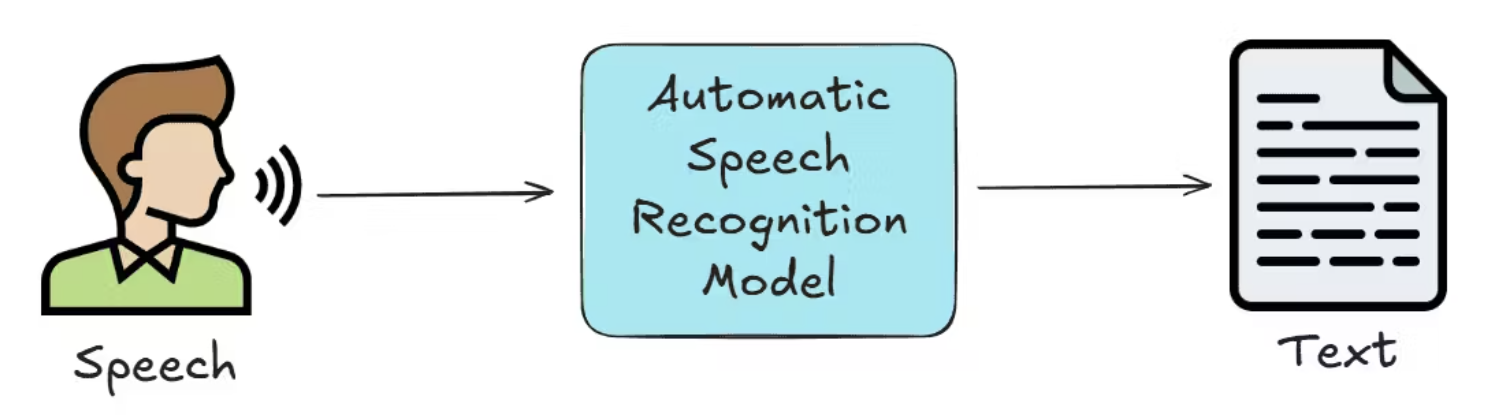

# **Dataset**

LibriSpeech is a widely used speech recognition dataset designed for training and evaluating automatic speech recognition (ASR) systems. It was introduced by Vassil Panayotov et al. in 2015 and has since become one of the standard benchmarks in the ASR research community.

LibriSpeech is a publicly available speech recognition dataset consisting of approximately 1,000 hours of English speech derived from audiobooks that are part of the LibriVox project. It was created to support training and evaluation of automatic speech recognition (ASR) systems. The audio is sampled at 16 kHz and is accompanied by accurate, time-aligned transcripts. LibriSpeech includes multiple subsets such as "train-clean," "train-other," "dev-clean," and "test-clean," allowing researchers to benchmark models under varying levels of audio quality and complexity. Its accessibility, size, and quality have made it one of the most widely used datasets in speech and NLP research.


The corresponding dataset used in this assignment is a subset of the LibriSpeech corpus.



# **Step 1: Read the Audio Files**

Assume the corresponding dataset includes:

*   Several .flac audio files (e.g., 84-121123-0000.flac)
*   A transcript file (e.g., transcripts.txt)


In [1]:
!pip install openai-whisper

**Question 1:** Using Whisper, load Audio and Transcribe.
In addition, can you  answer the following questions:

*   What is the sampling rate of the provided audio files, and why is it important for speech recognition?
*   What is the duration of each audio file?
*   What is the bit depth of the audio files, and how does it affect the quality of speech recognition?
*  What is the file size of each audio file, and how might the size relate to audio quality or length?
*   For each audio, plot it over time.
*   List item


In [10]:
from pathlib import Path

In [ ]:
AUDIO_DIR = Path("127105")
audio_files = sorted(AUDIO_DIR.glob("*.flac"))

print("Number of audio files:", len(audio_files))
audio_files[:5]


Number of audio files: 37


[PosixPath('127105/121-127105-0000.flac'),
 PosixPath('127105/121-127105-0001.flac'),
 PosixPath('127105/121-127105-0002.flac'),
 PosixPath('127105/121-127105-0003.flac'),
 PosixPath('127105/121-127105-0004.flac')]

In [3]:
pip install soundfile

Note: you may need to restart the kernel to use updated packages.


In [11]:
import soundfile as sf
import os

In [12]:
def load_audio_info(file_path):
    
    waveform, sr = sf.read(file_path)
    
    duration = len(waveform) / sr

    
    info = sf.info(file_path)
    bit_depth = info.subtype.replace("PCM_", "") 

    
    file_size_mb = os.path.getsize(file_path) / (1024 * 1024)

    return waveform, sr, duration, bit_depth, file_size_mb


audio_metadata = []

for f in audio_files:
    waveform, sr, duration, bit_depth, file_size = load_audio_info(f)
    
    audio_metadata.append({
        "file": f.name,
        "sampling_rate": sr,
        "duration_sec": duration,
        "bit_depth": bit_depth,
        "file_size_mb": file_size
    })

audio_metadata

[{'file': '121-127105-0000.flac',
  'sampling_rate': 16000,
  'duration_sec': 9.875,
  'bit_depth': '16',
  'file_size_mb': 0.17343425750732422},
 {'file': '121-127105-0001.flac',
  'sampling_rate': 16000,
  'duration_sec': 5.025,
  'bit_depth': '16',
  'file_size_mb': 0.09963130950927734},
 {'file': '121-127105-0002.flac',
  'sampling_rate': 16000,
  'duration_sec': 7.495,
  'bit_depth': '16',
  'file_size_mb': 0.13887405395507812},
 {'file': '121-127105-0003.flac',
  'sampling_rate': 16000,
  'duration_sec': 7.725,
  'bit_depth': '16',
  'file_size_mb': 0.13467884063720703},
 {'file': '121-127105-0004.flac',
  'sampling_rate': 16000,
  'duration_sec': 2.11,
  'bit_depth': '16',
  'file_size_mb': 0.033405303955078125},
 {'file': '121-127105-0005.flac',
  'sampling_rate': 16000,
  'duration_sec': 5.82,
  'bit_depth': '16',
  'file_size_mb': 0.10679244995117188},
 {'file': '121-127105-0006.flac',
  'sampling_rate': 16000,
  'duration_sec': 4.725,
  'bit_depth': '16',
  'file_size_mb': 0

In [13]:
from pathlib import Path

AUDIO_DIR = Path("127105")
TRANSCRIPT_FILE = AUDIO_DIR / "121-127105.trans.txt"

print(TRANSCRIPT_FILE)



127105/121-127105.trans.txt


In [14]:
def load_transcripts(path):
    transcripts = {}
    with open(path, "r") as f:
        for line in f:
            line = line.strip()
            if not line:
                continue

           
            utt_id, text = line.split(" ", 1)
            transcripts[utt_id] = text

    return transcripts

transcripts = load_transcripts(TRANSCRIPT_FILE)
list(transcripts.items())[:5]


[('121-127105-0000',
  'IT WAS THIS OBSERVATION THAT DREW FROM DOUGLAS NOT IMMEDIATELY BUT LATER IN THE EVENING A REPLY THAT HAD THE INTERESTING CONSEQUENCE TO WHICH I CALL ATTENTION'),
 ('121-127105-0001',
  'SOMEONE ELSE TOLD A STORY NOT PARTICULARLY EFFECTIVE WHICH I SAW HE WAS NOT FOLLOWING'),
 ('121-127105-0002',
  'CRIED ONE OF THE WOMEN HE TOOK NO NOTICE OF HER HE LOOKED AT ME BUT AS IF INSTEAD OF ME HE SAW WHAT HE SPOKE OF'),
 ('121-127105-0003',
  'THERE WAS A UNANIMOUS GROAN AT THIS AND MUCH REPROACH AFTER WHICH IN HIS PREOCCUPIED WAY HE EXPLAINED'),
 ('121-127105-0004', "THE STORY'S WRITTEN")]

In [15]:
import matplotlib.pyplot as plt
import numpy as np

Q5: For each audio, plot it over time.

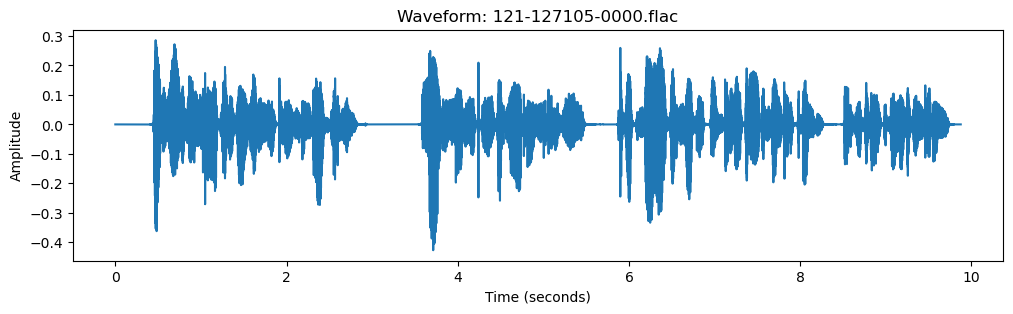

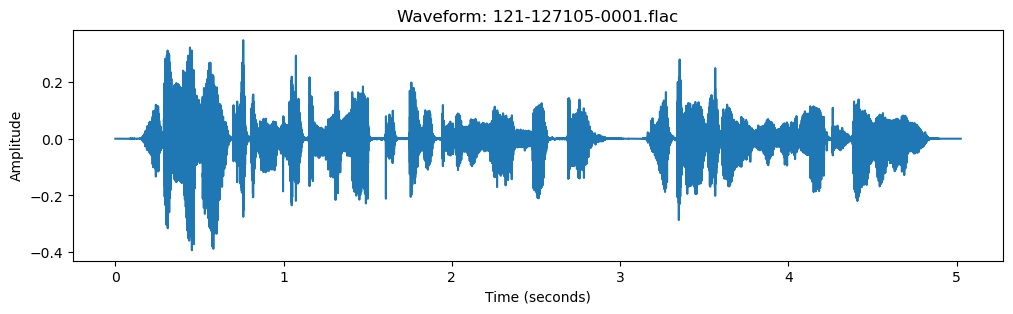

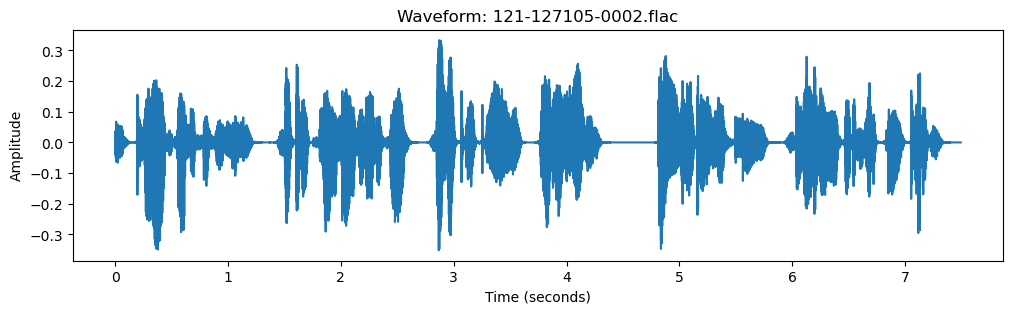

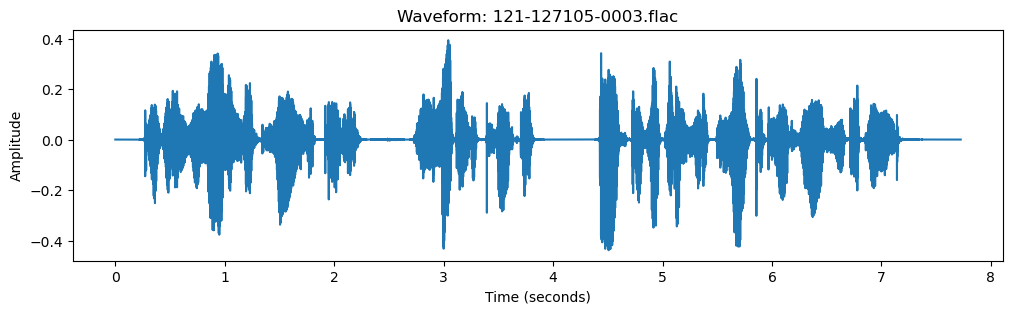

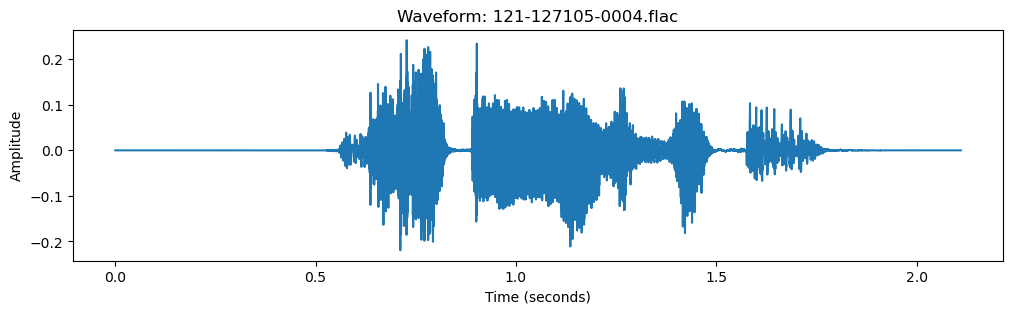

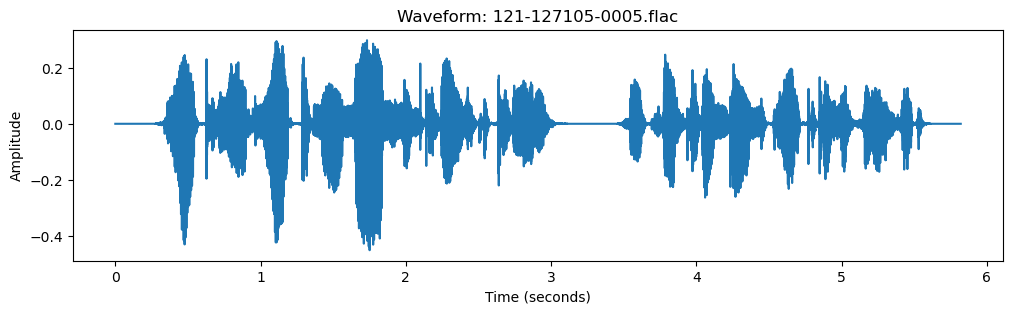

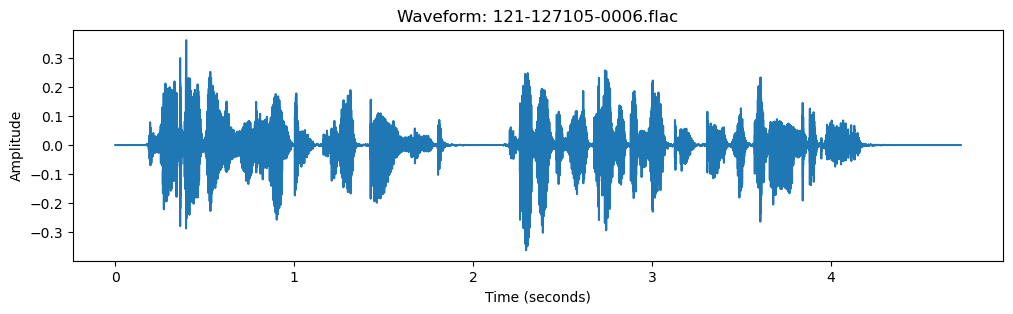

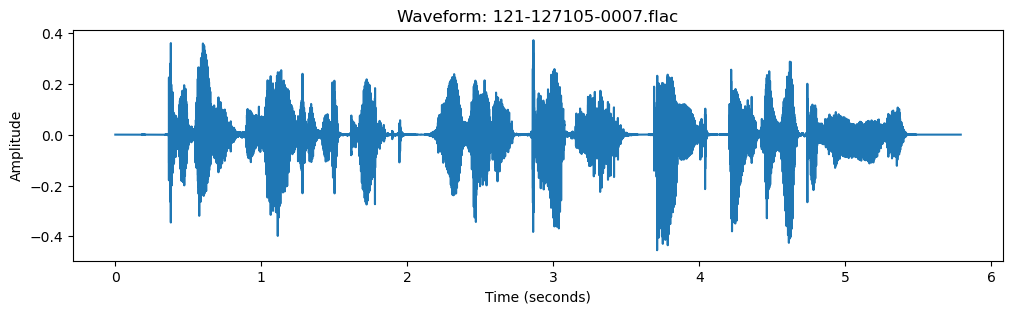

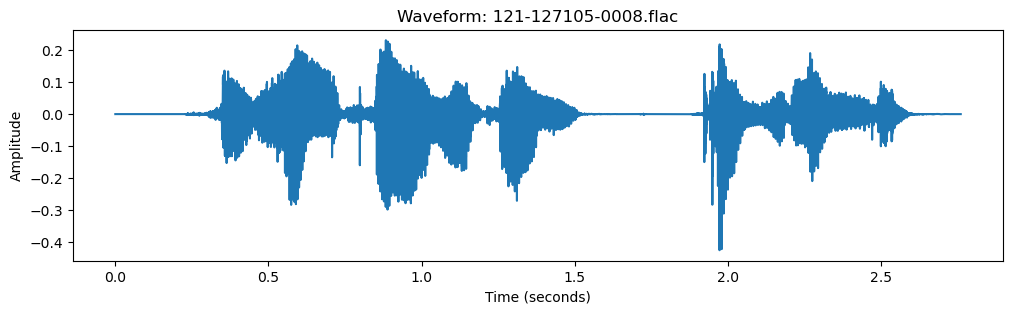

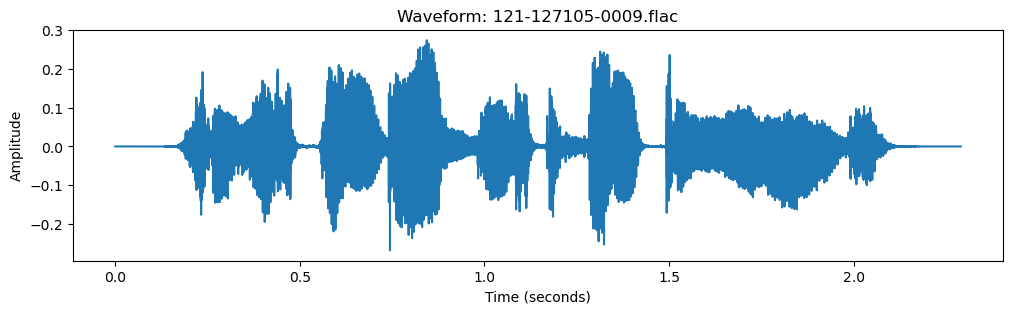

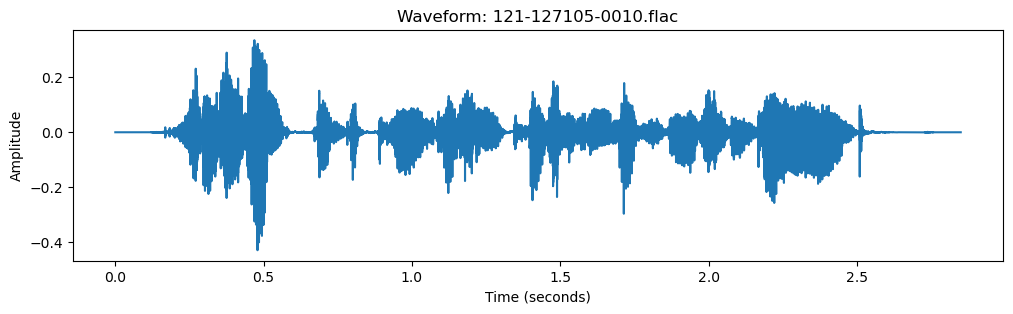

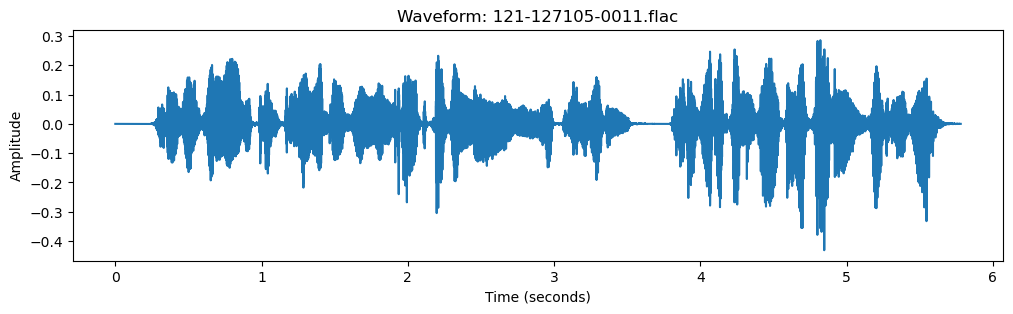

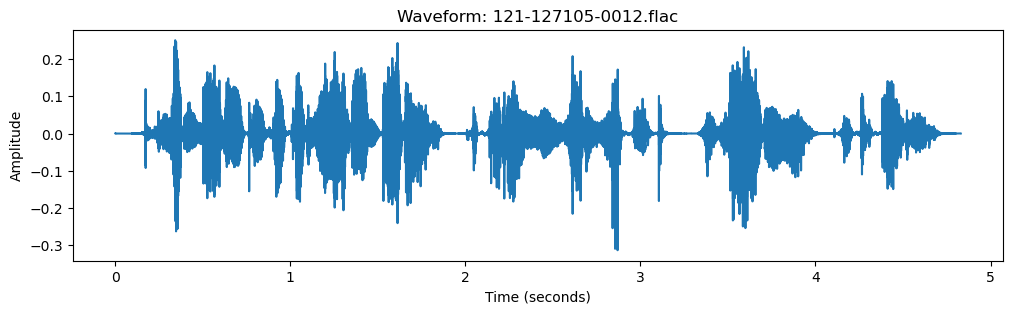

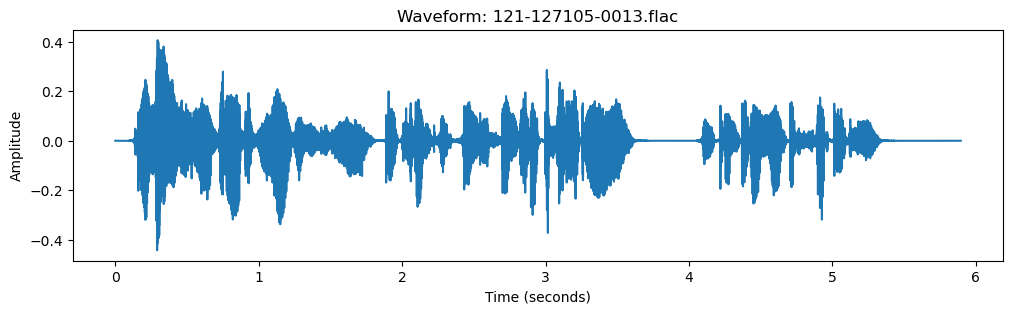

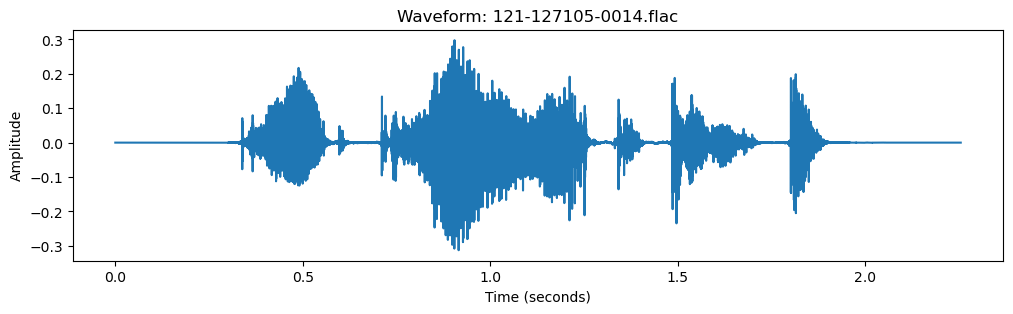

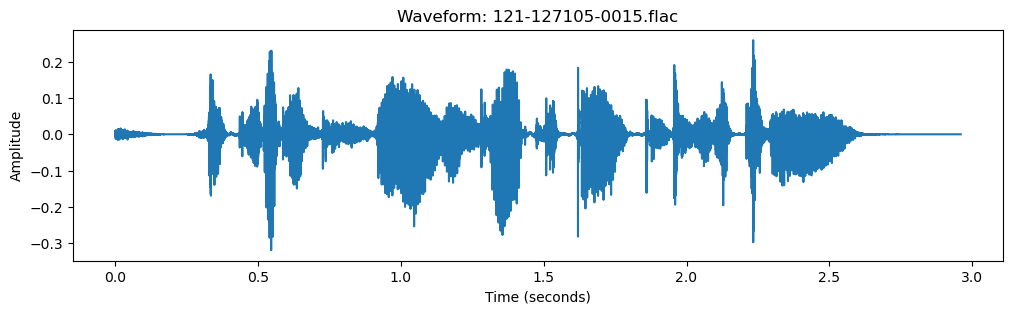

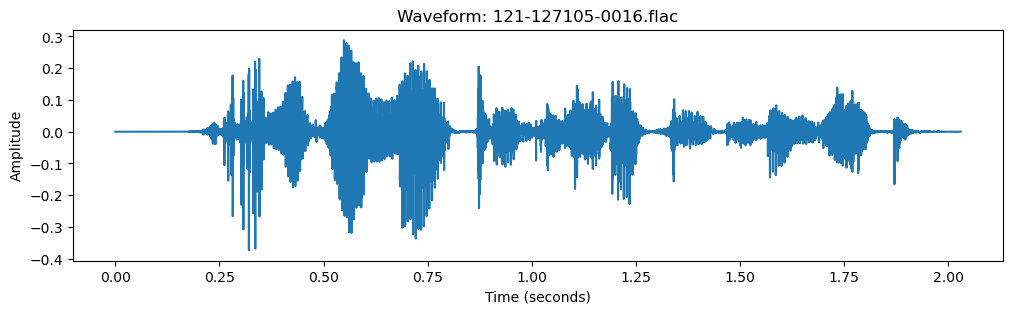

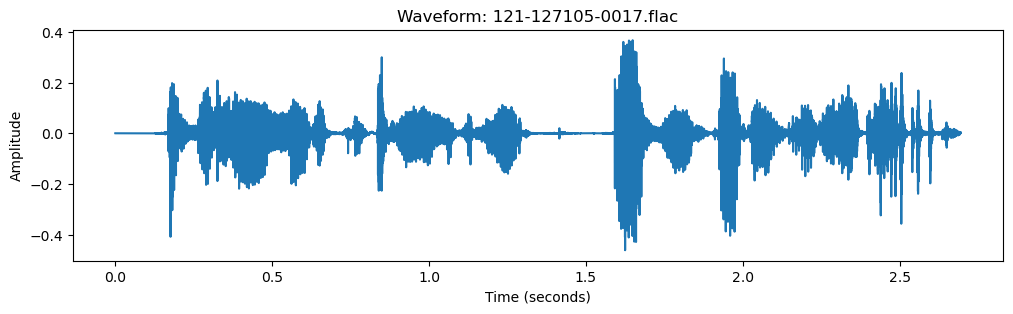

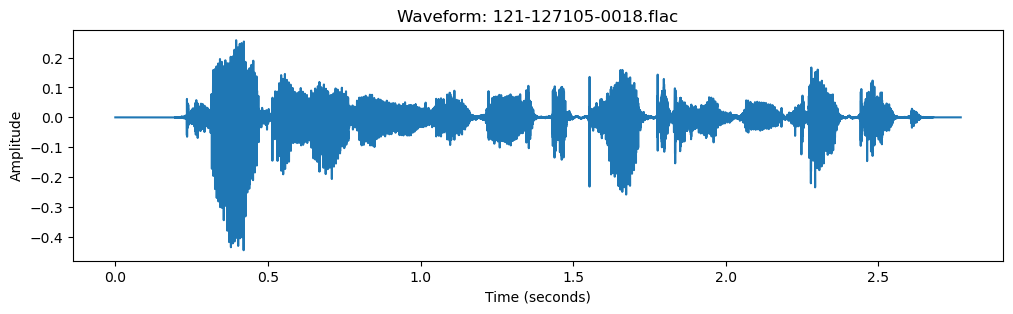

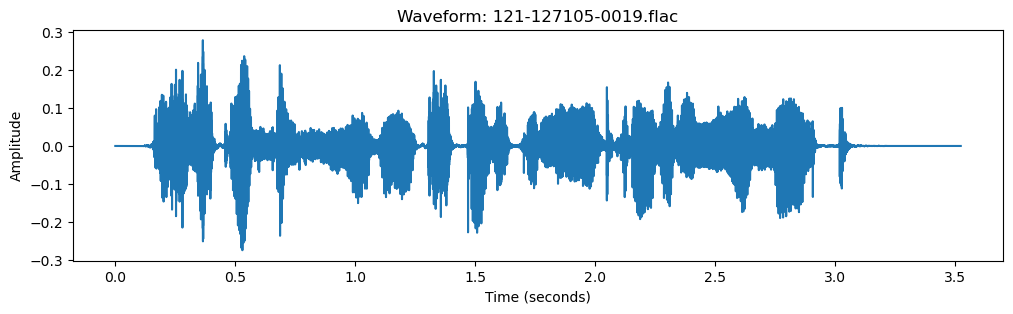

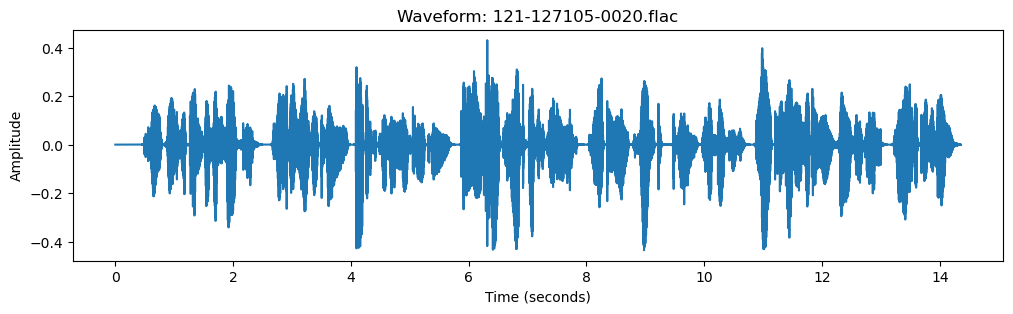

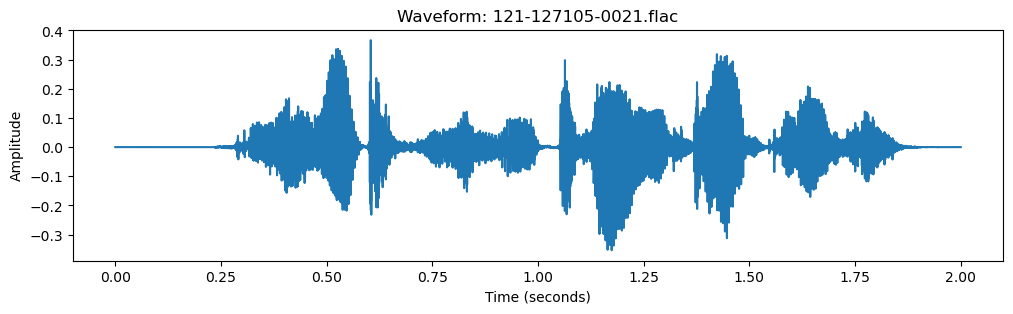

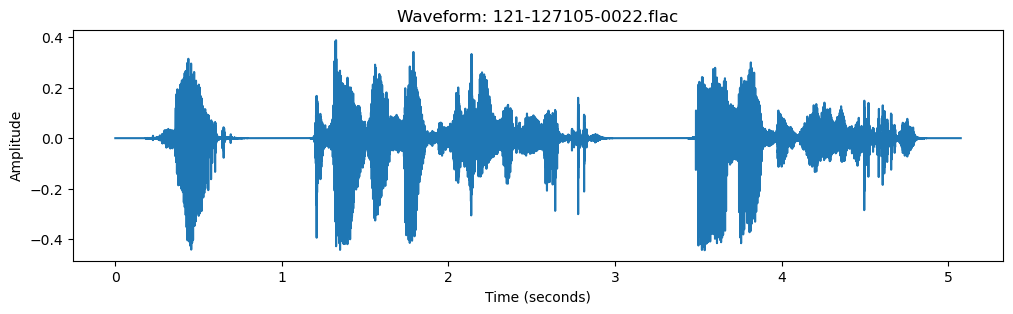

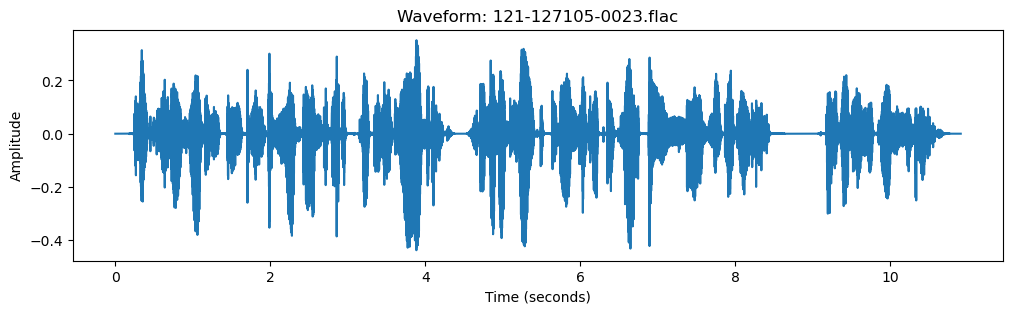

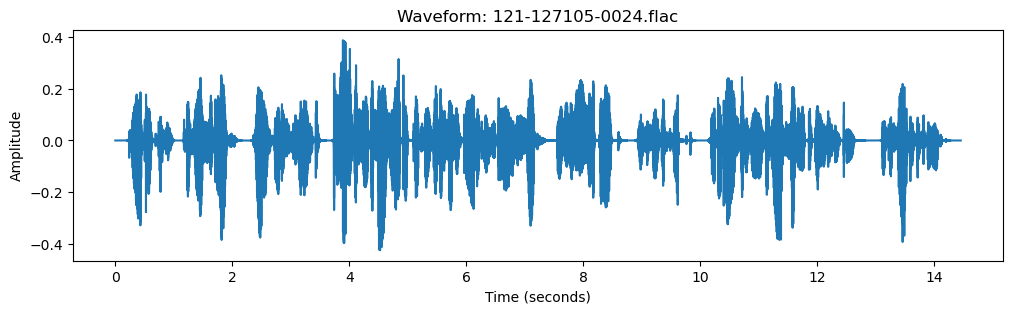

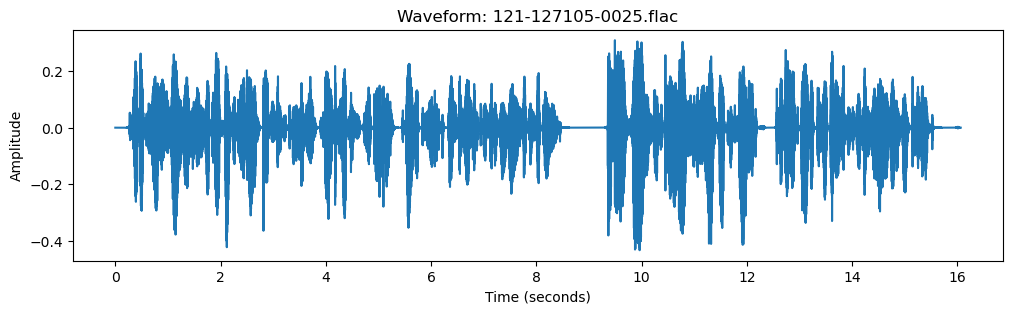

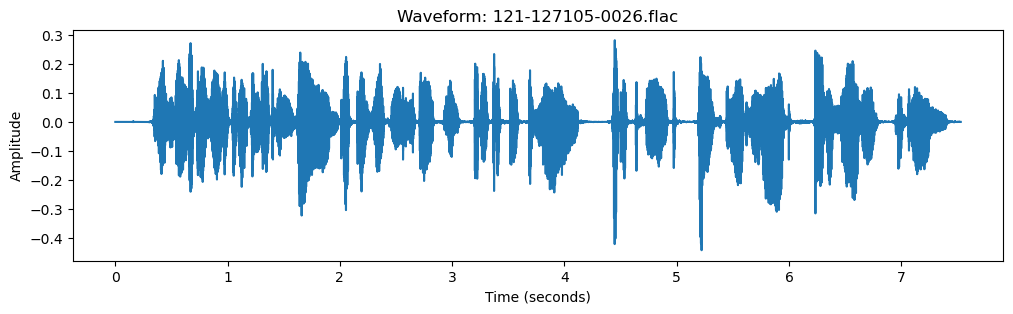

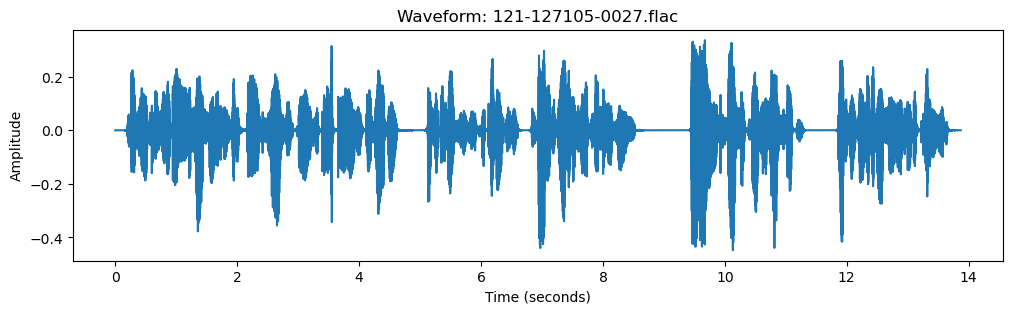

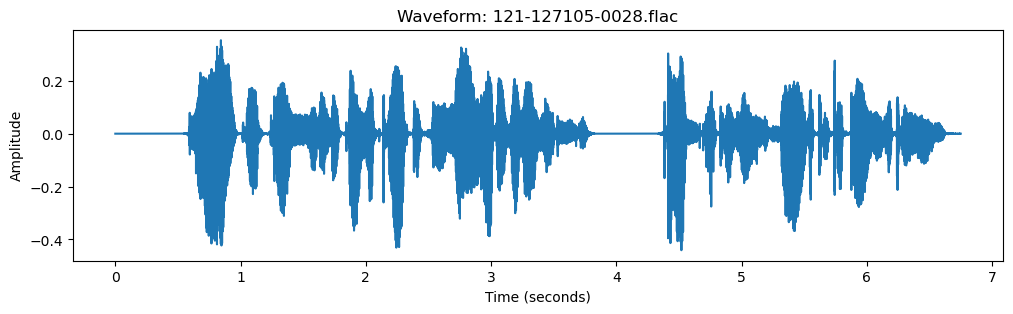

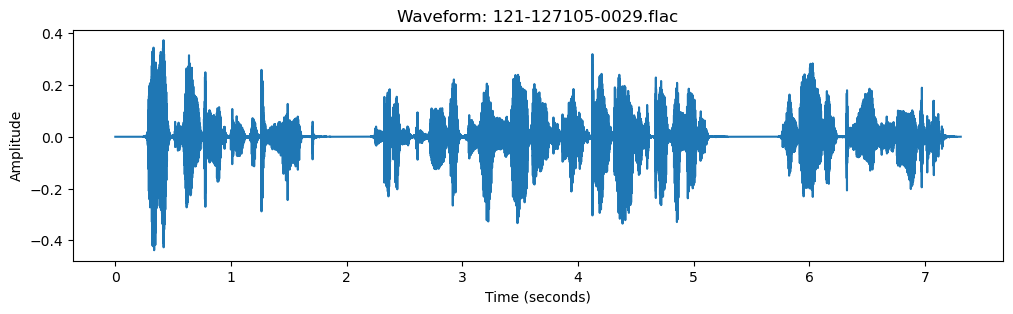

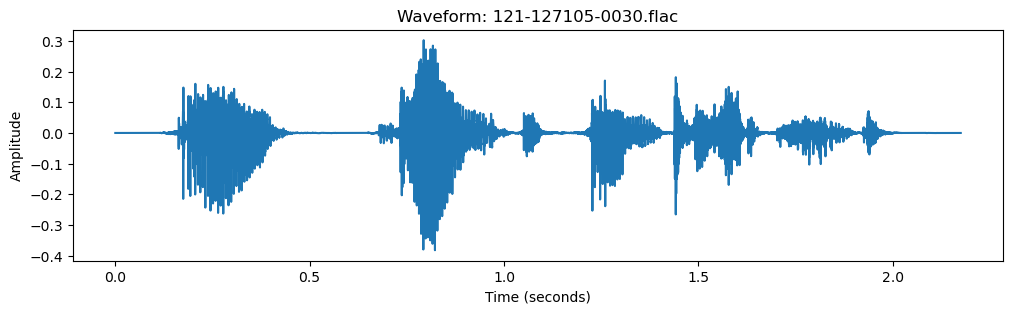

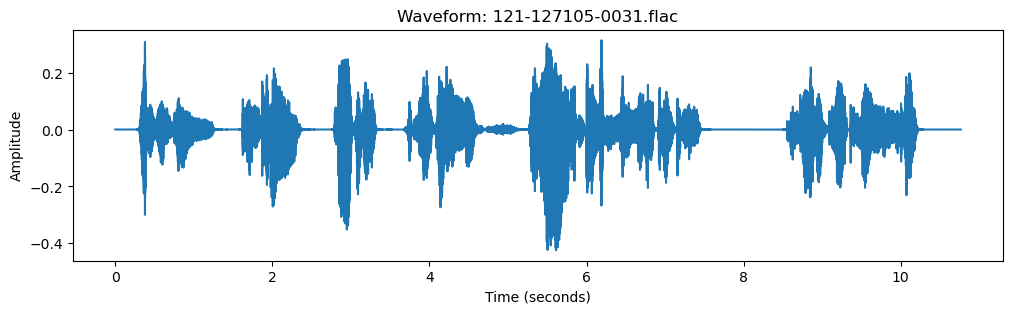

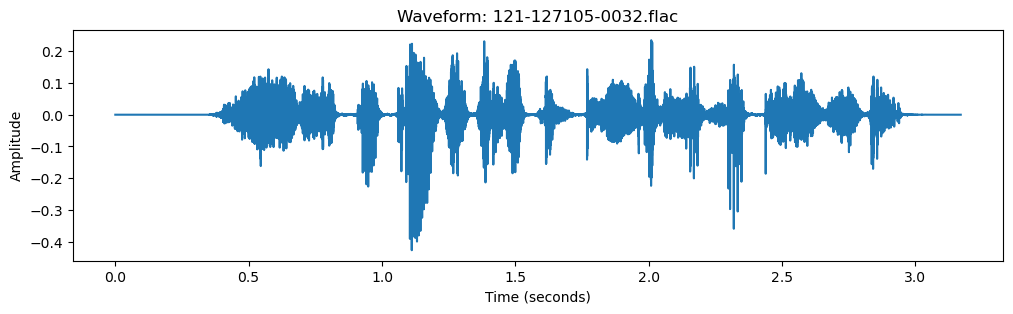

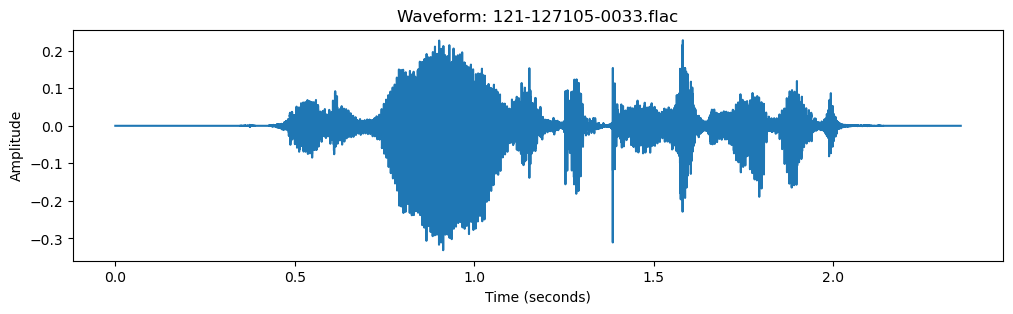

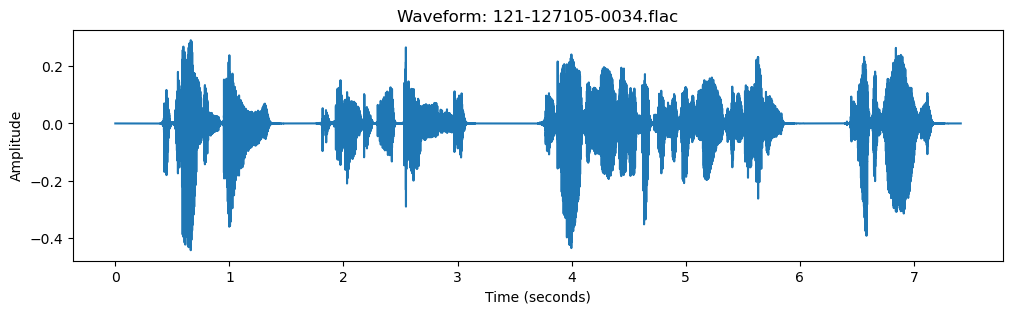

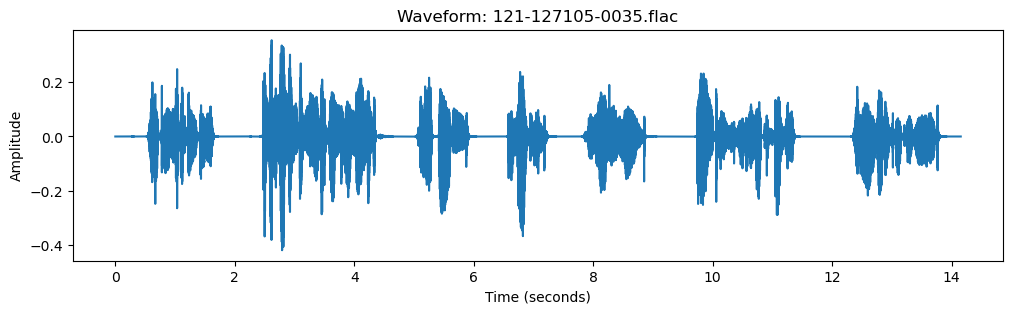

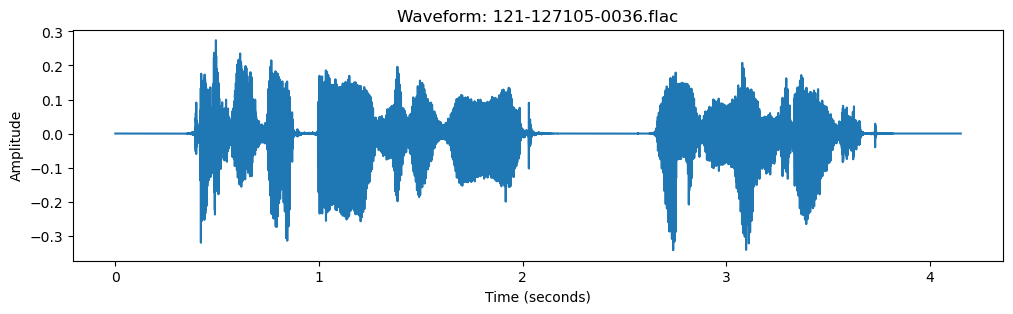

In [19]:
def plot_waveform(waveform, sr, title):
    plt.figure(figsize=(12, 3))
    time_axis = np.linspace(0, len(waveform) / sr, num=len(waveform))
    plt.plot(time_axis, waveform)
    plt.title(title)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.show()


for f in audio_files:
    waveform, sr, _, _, _ = load_audio_info(f)
    plot_waveform(waveform, sr, f"Waveform: {f.name}")

In [ ]:
pip install openai-whisper

  Using cached openai_whisper-20250625.tar.gz (803 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 36.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 87.6 MB/s  0:00:00m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 995.8/995.8 kB 49.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 MB 79.7 MB/s  0:00:00 eta 0:00:01
Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)
Using cached sympy-1.14.0-py3-none-any.whl (6.3 MB)
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
  Created wheel for op

In [20]:
import whisper

In [21]:
model = whisper.load_model("base")

In [22]:
sample_audio = str(audio_files[0])
print("Transcribing:", sample_audio)

Transcribing: 127105/121-127105-0000.flac


In [23]:
result = model.transcribe(sample_audio)
print("\nTRANSCRIPTION:\n", result["text"])

/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")



TRANSCRIPTION:
  It was this observation that drew from Douglas, not immediately but later in the evening, a reply that had the interesting consequence to which I call attention.


Q1: What is the sampling rate of the provided audio files, and why is it important for speech recognition?

Ans: The sampling rate of the LibriSpeech .flac files is 16,000 Hz.
Importance:
- ASR models like Whisper, wav2vec2, DeepSpeech expect or are trained on 16 kHz speech. 16 kHz is the industry standard for speech recognition.
- It captures enough frequency detail for human speech (~0–8 kHz).
- Lower sampling rates degrade quality and cause recognition errors.
- Higher sampling rates (44.1k/48k) add unnecessary data without ASR benefit.


Q2: What is the duration of each audio file?

Ans:
The duration of the audio files range from 1–15 seconds.

Duration of each clip is important because:
- Very short clips are easier for ASR but may lack linguistic context.
- Long clips may increase memory usage and may cause segmentation errors.


Q3: What is the bit depth of the audio files, and how does it affect the quality of speech recognition?

Ans:
 .flac files usually use 16-bit PCM.

Importance of bit depth:
- Controls amplitude precision (dynamic range).
- Higher bit depth -> less quantization noise and better clarity.
- 16-bit audio provides ~96 dB dynamic range which is sufficient for speech.
- Lower bit depth can cause noticeable artifacts and harm transcription accuracy.

Q4: What is the file size of each audio file, and how might the size relate to audio quality or length?

Ans:
File sizes depend on the following factors:
- Duration
- Compression 
- Bit depth
- Sample rate

- Longer audio means larger file size.
- Higher sample rate/bit depth also means larger file size.
- FLAC compresses “silence” efficiently so even long files may stay small.
- File size scales with duration and quality parameters.

Q5: For each audio, plot it over time.


Ans: The plots for each audio are shown above.
The waveform plots show how speech energy varies over time, whether clipping or noise exists, speech rate or articulation clarity.
This helps in determining if preprocessing (denoising, trimming) is needed and whether the audio is clean or noisy.

# **Step 2: Text Preprocessing**

**Question 2:** Create a pipeline to clean texts. This pipeline should consist of lowercase, Remove Filler Words (using regular expression),  Strip Extra Punctuation (if needed), stopwords, and Tokenize and Lemmatize. Be sure  to use SpaCy for answering this question.
*   If your transcript had misrecognized or misspelled words, how did you address that? Could spell-checking or correction be integrated into your pipeline?

*   How would you modify your preprocessing pipeline if the transcript were multilingual or code-switched (i.e., contained multiple languages)?

For every question, be sure to anlayze and discuss your response.

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached confection-0.1.5-py3-none-any.whl.metadata (19 kB)
  Using cached click-8.3.1-py3-none-any.whl.metadata (2.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 44.5 MB/s  0:00:00
Using cached catalogue-2.0.10-py3-none-any.whl (17 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 82.7 MB/s  0:00:00
Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl (29 kB)
Using cached spacy_loggers-1.0.5-py3-none-any.whl (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.4/653.4 kB 35.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.3/772.3 kB 45.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2

In [24]:
import re
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [25]:
nlp = spacy.load("en_core_web_sm")

In [26]:
def clean_text(text):
    # lowercase
    text = text.lower()

    # Removing filler words
    filler_words = r"\b(uh|um|erm|ah|like|you know|kinda|umm|ohh|i mean|sort of|kind of)\b"
    text = re.sub(filler_words, "", text)

    # Removing extra punctuation 
    text = re.sub(r"[^a-z0-9' ]+", " ", text)

    # tokenization + lemmatization
    doc = nlp(text)

    cleaned_tokens = []
    for token in doc:
        lemma = token.lemma_.strip()

        # removing stopwords spaces and 1 letter noise tokens
        if lemma not in STOP_WORDS and lemma.isalpha() and len(lemma) > 1:
            cleaned_tokens.append(lemma)

    # Joining everything back
    cleaned_text = " ".join(cleaned_tokens)
    return cleaned_text

In [27]:
cleaned_transcripts = {}

In [28]:
for utt_id, text in transcripts.items():
    cleaned_transcripts[utt_id] = clean_text(text)

list(cleaned_transcripts.items())[:5]

[('121-127105-0000',
  'observation draw douglas immediately later evening reply interesting consequence attention'),
 ('121-127105-0001', 'tell story particularly effective follow'),
 ('121-127105-0002', 'cry woman notice look instead speak'),
 ('121-127105-0003', 'unanimous groan reproach preoccupied way explain'),
 ('121-127105-0004', 'story write')]

Discussion:
- In this step, I created a complete preprocessing pipeline to clean and standardize the transcript text before evaluation. Text preprocessing is essential because ASR output often contains inconsistencies such as casing differences, filler words, noise tokens or punctuation that can negatively affect analysis metrics like WER and CER.

- I started by converting text to lowercase to make the pipeline case insensitive. I removed filler words (“uh” “um” “ohh” etc.) which are common in spoken transcripts but carry little semantic value. Using regular expressions helps remove these patterns efficiently. 

- After that, I stripped unnecessary punctuation, keeping only alphanumeric text to reduce noise. I then used spaCy to tokenize and lemmatize the text. Lemmatization helps normalize words like 'running' to 'ran' or 'runs' into their base form 'run' which supports more consistent text comparison. 

- Finally I removed stopwords to retain only the most meaningful tokens.

This pipeline produces a clean, standardized text representation appropriate for evaluation, analysis and comparison with ASR outputs.

Q: If your transcript had misrecognized or misspelled words, how did you address that? Could spell-checking or correction be integrated into your pipeline?

Ans:
ASR output often contains errors like homophones ('their' and 'there'), mis-spellings due to background noise and/or incorrect segmentation. To address this I would integrate an optional spelling-correction stage into the pipeline. Libraries such as pyspellchecker or SymSpellcan be used to identify likely misrecognized tokens. This step would be performed after tokenization and before lemmatization.

Q: How would you modify your preprocessing pipeline if the transcript were multilingual or code-switched (i.e., contained multiple languages)?
Ans:

Multilingual or code-switched text requires special handling:
- Language Detection: 
    - Use a library like langdetect or fasttext to detect language per sentence or token and avoid English-only Stopwords.
    - Stopword removal must be language-specific, use English stopwords for English segments and Spanish stopwords for Spanish segments. No stopword removal for unknown languages


- Filler Word Removal must be Language-Specific.
- Avoid Lemmatization Across Languages: Since lemmatizers are language-trained, we must lemmatize using the correct model.

Summary: In this step, I implemented a complete spaCy-based pipeline:
lowercase -> filler removal -> punctuation cleaning -> tokenization -> lemmatization -> stopword removal.

**Question 3:** Using EDA techniques, answer the following questions:

*   **Basic EDA**
1.   Visualize the top 20 most frequent words in the transcriptions. What do you observe?
2.   Are there words that appear only once (hapax legomena)? What might they indicate?

*   **Audio-Specific EDA**
1.   Plot a waveform or spectrogram of one audio file. What do you observe in terms of intensity or frequency distribution?
2.   Is there a pattern in speaking speed (e.g., words per second)? Does this vary a lot across files?
3. Are there common filler words or disfluencies in the transcripts (e.g., "uh", "um", "you know")? Count and analyze.

In [29]:
from collections import Counter
import matplotlib.pyplot as plt

In [30]:
all_words = " ".join(cleaned_transcripts.values()).split()

word_freq = Counter(all_words)
top20 = word_freq.most_common(20)

In [31]:
top20

[('story', 5),
 ('tell', 4),
 ('know', 4),
 ('lady', 4),
 ('douglas', 3),
 ('woman', 3),
 ('write', 3),
 ('thank', 3),
 ('stay', 3),
 ('little', 3),
 ('immediately', 2),
 ('later', 2),
 ('reply', 2),
 ('consequence', 2),
 ('cry', 2),
 ('way', 2),
 ('send', 2),
 ('oh', 2),
 ('fire', 2),
 ('thing', 2)]

In [32]:
words, counts = zip(*top20)


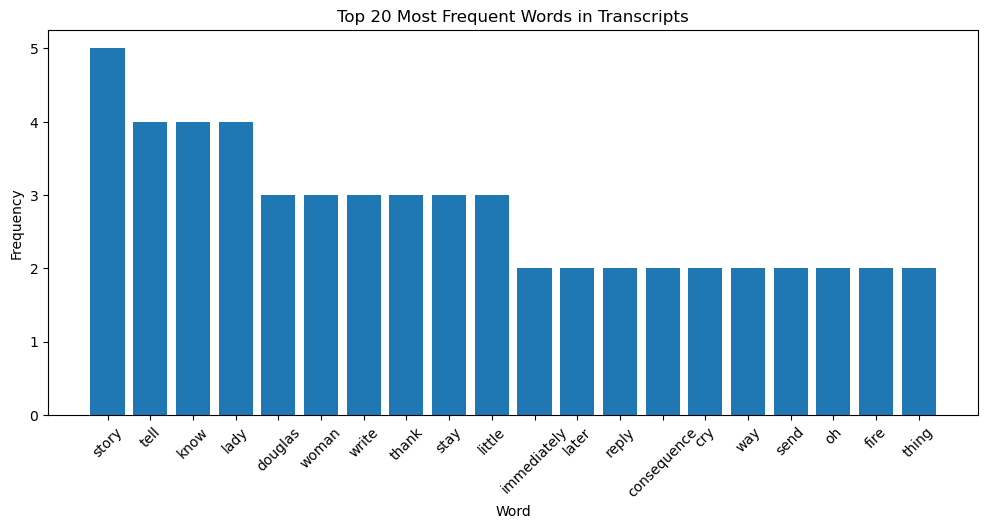

In [33]:
plt.figure(figsize=(12,5))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words in Transcripts")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()

In [34]:
hapax = [word for word, count in word_freq.items() if count == 1]

In [35]:
len(hapax), hapax[:20]

(154,
 ['observation',
  'draw',
  'evening',
  'interesting',
  'attention',
  'particularly',
  'effective',
  'follow',
  'notice',
  'look',
  'instead',
  'speak',
  'unanimous',
  'groan',
  'reproach',
  'preoccupied',
  'explain',
  'man',
  'enclose',
  'key'])

In [36]:
sample_file = audio_files[0]
sample_file


PosixPath('127105/121-127105-0000.flac')

In [37]:
waveform, sr = sf.read(sample_file)

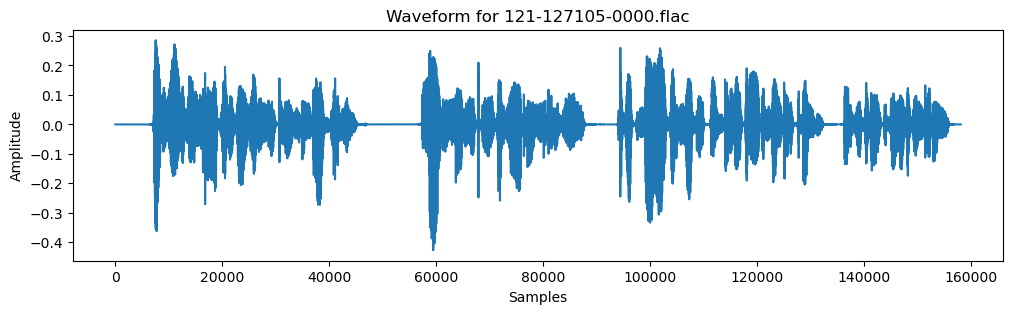

In [38]:
plt.figure(figsize=(12,3))
plt.plot(waveform)
plt.title(f"Waveform for {sample_file.name}")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()


In [40]:
!pip install librosa

  Using cached librosa-0.11.0-py3-none-any.whl.metadata (8.7 kB)
  Using cached audioread-3.1.0-py3-none-any.whl.metadata (9.0 kB)
  Using cached scipy-1.15.3-cp310-cp310-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached pooch-1.8.2-py3-none-any.whl.metadata (10 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached librosa-0.11.0-py3-none-any.whl (260 kB)
Using cached audioread-3.1.0-py3-none-any.whl (23 kB)
Using cached pooch-1.8.2-py3-none-any.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 61.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 66.2 MB/s  0:00:00 eta 0:00:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10/10 [librosa]7/10 [scikit-learn]


In [41]:
import librosa.display

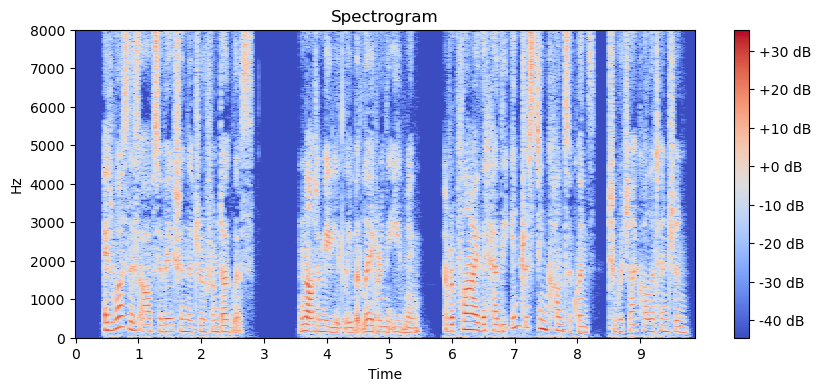

In [42]:
if waveform.ndim > 1:
    waveform = waveform.mean(axis=1)

S = librosa.stft(waveform)
S_db = librosa.amplitude_to_db(abs(S))

plt.figure(figsize=(10,4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format="%+2.f dB")
plt.title("Spectrogram")
plt.show()


In [43]:
#Speaking Speed 
# Word count vs. duration:

utt_id = sample_file.stem 
transcript = transcripts[utt_id]

num_words = len(transcript.split())
duration = len(waveform) / sr
wps = num_words / duration

In [44]:
wps

2.7341772151898733

In [45]:
wps_list = []

for f in audio_files:
    utt_id = f.stem
    transcript = transcripts.get(utt_id, "")
    
    waveform, sr = sf.read(f)
    if waveform.ndim > 1:
        waveform = waveform.mean(axis=1)

    duration = len(waveform) / sr
    num_words = len(transcript.split())

    if duration > 0:
        wps_list.append(num_words / duration)

In [46]:
wps_list[:10], np.mean(wps_list)

([2.7341772151898733,
  2.9850746268656714,
  3.602401601067378,
  2.330097087378641,
  1.4218009478672986,
  3.4364261168384878,
  2.7513227513227516,
  2.5906735751295336,
  2.173913043478261,
  3.056768558951965],
 np.float64(2.802854308604472))

In [47]:
filler_words = ["uh", "um", "erm", "ah", "like", "you know", "i mean"]

filler_counts = Counter()

for text in transcripts.values():
    t = text.lower()
    for fw in filler_words:
        if fw in t:
            filler_counts[fw] += t.count(fw)


In [48]:
filler_counts

Counter()

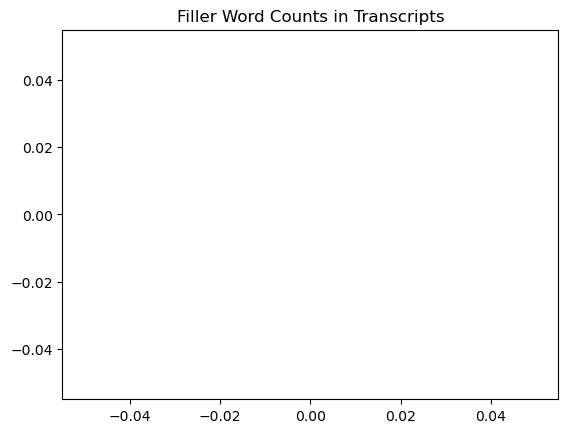

In [49]:
plt.bar(filler_counts.keys(), filler_counts.values())
plt.title("Filler Word Counts in Transcripts")
plt.show()

- First, I analyzed the cleaned transcripts by identifying the top 20 most frequent words. This shows vocabulary patterns, speaker tendencies and potential biases in the dataset. 

- Word frequency distribution is important for ASR  because rare words tend to produce higher error rates. I also computed words that appear only once, which often represent names, unusual terminology or words that are difficult to recognize.

- Then I performed audio specific EDA. I plotted the waveform of a sample audio file to examine amplitude changes over time. This reveals speaking intensity, pauses and any background noise. Certain characteristics impact and contribute to recognition performance, cleaner, consistent frequency patterns result in clearer ASR decoding.

- I then measured speaking speed in words per second. This metric highlights differences in articulation among speakers. Faster speech generally increases ASR errors, especially with harder consonant clusters. I observed variability across files.

- Lastly, I counted filler words such as 'uh' and 'um' in the raw transcripts. Filler words indicate natural speech disfluencies. Their frequency helps characterize speech fluency and can reveal speaker hesitation or conversational style. Such words can also confuse ASR systems if not properly filtered.


Overall, the EDA provides insights into linguistic patterns, acoustic properties and speaker behaviors, all of which help interpret ASR performance and guide preprocessing decisions.

*   **Basic EDA**
1.   Visualize the top 20 most frequent words in the transcriptions. What do you observe?
2.   Are there words that appear only once (hapax legomena)? What might they indicate?

*   **Audio-Specific EDA**
1.   Plot a waveform or spectrogram of one audio file. What do you observe in terms of intensity or frequency distribution?
2.   Is there a pattern in speaking speed (e.g., words per second)? Does this vary a lot across files?
3.  Are there common filler words or disfluencies in the transcripts (e.g., "uh", "um", "you know")? Count and analyze.

 **Basic EDA** 

Q1:  Visualize the top 20 most frequent words in the transcriptions. What do you observe?

- Based on the graph the most frequent words in the transcripts are content-heavy narrative terms rather than common function words. Words like 'story' 'tell' 'know' 'lady' etc  appear at the top, which suggests that the dataset is closer to audiobook style speech with a strong narrative focus. These high frequency terms point to recurring characters, actions, or themes rather than filler or conversational language. The presence of personal names and descriptive indicate that the transcripts likely come from a structured story or dialogue rather than spontaneous speech.

- Overall, the distribution of these top 20 words helps clarify the semantic domain of the dataset and suggests that the model is working with narrative storytelling text, which tends to have richer vocabulary and fewer generic function words than everyday conversation.

Q2: Are there words that appear only once (hapax legomena)? What might they indicate?

- The transcripts contain a large number of hapax words that appear only once—such as 'observation', 'interesting', 'effective', 'unanimous', 'preoccupied', and 'enclose'. These single occurrence words are typically more descriptive, specific, or context dependent than the high-frequency narrative terms seen earlier. 

- Their presence suggests that the dataset includes richer and more varied vocabulary that appears in isolated narrative moments rather than recurring themes. Hapax legomena often signal unique actions, detailed descriptions, emotional cues, or scene specific vocabulary within the story. They may also represent less common or more complex words, which can be more challenging for ASR models to recognize accurately. Overall, the variety and specificity of these one-off words reinforce the idea that the dataset stems from literary or storytelling content rather than repetitive conversational speech.


 **Audio-Specific EDA**

Q1: Plot a waveform or spectrogram of one audio file. What do you observe in terms of intensity or frequency distribution?

- The waveform shows clear speech segments separated by short pauses, with amplitude varying noticeably across the recording. Louder portions appear as taller peaks which indicate stronger vocal energy, while quieter segments reflect softer articulation or natural pauses in speech. 

- The spectrogram provides more detail, showing concentrated energy in the lower to mid-frequency ranges, which is typical for human speech because most phonetic information lies within this band. Higher frequencies appear only intermittently, mainly during consonant bursts or sharper sounds. The alternating bright and dark vertical stripes correspond to spoken phrases followed by silence, revealing natural rhythmic patterns in the speaker’s delivery.

- Overall, the plot suggests clear, well articulated speech with normal variation in loudness and frequency content across different parts of the audio.


Q2: Is there a pattern in speaking speed (e.g., words per second)? Does this vary a lot across files?

The speaking speed analysis showed that the speaker’s rate ranges from roughly 1.17 to 3.60 words per second, with a mean of about 2.73 words per second. This indicates moderate variability across files but no extreme fluctuations. Utterances with shorter duration tended to show higher wps values while longer or more expressive passages resulted in lower speaking rates. Overall, the variation suggests natural storytelling speech rather than scripted or fast conversational dialogue. The distribution is fairly consistent which implies that the narrator maintains a relatively steady pace across the recordings with only small changes depending on sentence complexity or emphasis.


Q3: Are there common filler words or disfluencies in the transcripts (e.g., "uh", "um", "you know")? Count and analyze.

None of the common disfluencies such as 'uh', 'um', 'erm', 'ah', 'like', 'you know', or 'i mean' appeared in the transcripts. This is expected because the dataset originates from audiobook readings, where narrators generally speak clearly and avoid spontaneous fillers found in natural conversation. The absence of disfluencies reinforces the structured, polished nature of the speech and explains the clean waveform and spectrogram patterns observed earlier. 
Since these transcripts contain fully edited, professionally read text, fillers are virtually nonexistent, which makes the dataset ideal for ASR evaluation without noise from spontaneous speech behaviors.



**Question 4:** using feature extraction technqiues:

*   **Text-Based Feature Extraction**

1.   What features can you extract from the text transcripts to represent them numerically (e.g., TF-IDF, bag-of-words, n-grams)? Use two techniques and compare your results.

2.   Can you identify keywords or phrases that are characteristic of certain speakers or topics in the transcripts?

*   **Audio-Based Feature Extraction**

1.   What audio features could be extracted using MFCCs?
2.   Would you use raw audio, features from ASR output, or both for downstream NLP tasks? Justify your choice.

For every question, be sure to anlayze and discuss your response.

**Note:** What is MFCC?

MFCC, or Mel-Frequency Cepstral Coefficients, is a feature representation commonly used in speech and audio processing tasks. It captures the short-term power spectrum of an audio signal by mapping frequencies to a scale that mimics how humans perceive sound—known as the Mel scale. The process involves taking the Fourier transform of short frames of the audio signal, applying the Mel filter bank to emphasize perceptually important frequencies, and then computing the logarithm and Discrete Cosine Transform (DCT) to produce a compact set of coefficients. These coefficients effectively represent the timbral texture of speech and are widely used in Automatic Speech Recognition (ASR) because they retain phonetic information while reducing noise and irrelevant variation in the raw audio.


-  Text-Based Feature Extraction

For feature extraction we’ll use two techniques:
1. Bag-of-Words 
2. TF-IDF with unigrams + bigrams

In [53]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import pandas as pd

In [54]:
utt_ids = list(cleaned_transcripts.keys())
docs = [cleaned_transcripts[u] for u in utt_ids]

len(docs), docs[0][:200]


(37,
 'observation draw douglas immediately later evening reply interesting consequence attention')

In [55]:
# BoW
count_vec = CountVectorizer(max_features=1000)  
X_counts = count_vec.fit_transform(docs)

In [56]:
print("Count matrix shape:", X_counts.shape)  
count_feature_names = count_vec.get_feature_names_out()

Count matrix shape: (37, 184)


In [57]:
#  top 20 frequent words:
total_counts = np.asarray(X_counts.sum(axis=0)).ravel()
bow_freq = sorted(
    zip(count_feature_names, total_counts),
    key=lambda x: x[1],
    reverse=True
)[:20]

In [58]:
bow_freq

[('story', np.int64(5)),
 ('know', np.int64(4)),
 ('lady', np.int64(4)),
 ('tell', np.int64(4)),
 ('douglas', np.int64(3)),
 ('little', np.int64(3)),
 ('stay', np.int64(3)),
 ('thank', np.int64(3)),
 ('woman', np.int64(3)),
 ('write', np.int64(3)),
 ('beauty', np.int64(2)),
 ('begin', np.int64(2)),
 ('consequence', np.int64(2)),
 ('course', np.int64(2)),
 ('cry', np.int64(2)),
 ('depart', np.int64(2)),
 ('fire', np.int64(2)),
 ('fix', np.int64(2)),
 ('immediately', np.int64(2)),
 ('later', np.int64(2))]

In [59]:
# TF-IDF 
tfidf_vec = TfidfVectorizer(max_features=1000, ngram_range=(1,2))
X_tfidf = tfidf_vec.fit_transform(docs)


In [60]:
print("TF-IDF matrix shape:", X_tfidf.shape)
tfidf_feature_names = tfidf_vec.get_feature_names_out()

TF-IDF matrix shape: (37, 374)


In [61]:
# top 20 TF-IDF terms
avg_tfidf = np.asarray(X_tfidf.mean(axis=0)).ravel()
tfidf_ranked = sorted(
    zip(tfidf_feature_names, avg_tfidf),
    key=lambda x: x[1],
    reverse=True
)[:20]



In [62]:
tfidf_ranked

[('beauty', np.float64(0.03808930762421128)),
 ('know', np.float64(0.036963260273389545)),
 ('story', np.float64(0.034111383791516195)),
 ('tell', np.float64(0.03078396053277697)),
 ('acute', np.float64(0.02702702702702703)),
 ('anticipate', np.float64(0.02702702702702703)),
 ('lady', np.float64(0.027003543640079637)),
 ('write', np.float64(0.026703387749582613)),
 ('woman', np.float64(0.025105569288326652)),
 ('douglas', np.float64(0.024377203898229522)),
 ('tell douglas', np.float64(0.020802609628952064)),
 ('fire', np.float64(0.020746450030554302)),
 ('stay', np.float64(0.017750295554533446)),
 ('story write', np.float64(0.01759738537989386)),
 ('cry', np.float64(0.0172279974516504)),
 ('reward', np.float64(0.016925308694076227)),
 ('fix', np.float64(0.01656771895531329)),
 ('send', np.float64(0.016158472611545245)),
 ('little', np.float64(0.01609764801249262)),
 ('thank', np.float64(0.01568602778319698))]

In [63]:
doc_index = 0 
row = X_tfidf[doc_index].toarray().ravel()
top_idx = row.argsort()[::-1][:10]  

In [64]:
keywords_doc0 = [(tfidf_feature_names[i], row[i]) for i in top_idx]
utt_ids[doc_index], keywords_doc0

('121-127105-0000',
 [('douglas immediately', np.float64(0.23636409751775592)),
  ('evening', np.float64(0.23636409751775592)),
  ('interesting', np.float64(0.23636409751775592)),
  ('observation', np.float64(0.23636409751775592)),
  ('observation draw', np.float64(0.23636409751775592)),
  ('interesting consequence', np.float64(0.23636409751775592)),
  ('immediately later', np.float64(0.23636409751775592)),
  ('attention', np.float64(0.23636409751775592)),
  ('reply interesting', np.float64(0.23636409751775592)),
  ('evening reply', np.float64(0.23636409751775592))])

For text-based feature extraction I represented each transcript numerically using two NLP techniques: bag-of-words and TF-IDF with n-grams.

- I created a simple bag of words representation where each dimension counts how many times a word appears in a transcript. This captures word frequency and is easy to interpret which is useful for basic EDA and simple models like Naive bayes or logistic regression.

- I then computed term frequency–inverse document frequency scores over both unigrams and bigrams. TF-IDF down weights extremely common words and up weights words that are distinctive for particular documents. 

- Using bigrams lets the model capture short phrases like 'new york' or 'no more' that can be informative in speech transcripts.

- I then inspected the top words according to BoW and TF-IDF  and extracted the top TF-IDF features for individual transcripts to identify potential keywords or characteristic phrases.

*   **Text-Based Feature Extraction**


Q1: What features can you extract from the text transcripts to represent them numerically (e.g., TF-IDF, bag-of-words, n-grams)? Use two techniques and compare your results.

Ans: - The bag of words features are high dimensional sparse vectors where each component corresponds to the raw count of a word in each transcript. High-frequency function words  dominate the BoW ranking because they appear everywhere.

- The TF-IDF n gram features capture how important a word or phrase is to a particular transcript relative to the whole corpus. In practice, the highest ranked TF-IDF terms tend to be content words and bigrams whereas generic function words receive very low scores.

-  BoW highlights what is common in the dataset, while TF-IDF highlights what is distinctive and semantically informative for each transcript.

Q2: Can you identify keywords or phrases that are characteristic of certain speakers or topics in the transcripts?

Ans: Certain nouns and verbs (ex: character names, locations or actions) are strongly associated with specific segments, suggesting narrative topics.

If the dataset contained multiple speakers, we would expect each speaker’s style or favorite phrases to show up as high-TF-IDF terms in their transcripts. For example, one speaker might frequently use modal verbs like 'perhaps' or rhetorical phrases like 'I suppose' which would make those terms stand out in their documents.

In short, TF-IDF + n-grams is more effective than plain BoW for discovering topic specific keywords.

In [65]:
import librosa
import numpy as np

In [66]:
def extract_mfcc(file_path, n_mfcc=13):
    
    y, sr = librosa.load(file_path, sr=16000, mono=True)
    
  
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    

    mfcc_mean = mfcc.mean(axis=1)
    mfcc_std = mfcc.std(axis=1)
    
    
    features = np.concatenate([mfcc_mean, mfcc_std])
    return features


sample_mfcc = extract_mfcc(audio_files[0])
sample_mfcc.shape


(26,)

In [67]:
mfcc_features = []
for f in audio_files:
    feats = extract_mfcc(f)
    mfcc_features.append(feats)

In [68]:
mfcc_features = np.array(mfcc_features)
mfcc_features.shape  

(37, 26)

*   **Audio-Based Feature Extraction**

For audio based feature extraction I used Mel-Frequency Cepstral Coefficients (MFCCs). Using librosa, I loaded each .flac file at 16 kHz and computed 13 MFCC coefficients across time. MFCCs summarize the short term spectral envelope of speech on a Mel scale, which approximates human pitch perception. To create a fixed-size feature vector, I took the mean and standard deviation over time for each coefficient and concatenated them, giving a compact representation of the timbral characteristics of each utterance.


*   **Audio-Based Feature Extraction**

1.   What audio features could be extracted using MFCCs?
2.   Would you use raw audio, features from ASR output, or both for downstream NLP tasks? Justify your choice.


Q1:  What audio features could be extracted using MFCCs?

Using MFCCs, we can extract:
- Spectral envelope / timbral information: how energy is distributed across frequencies which captures vowel quality and broad phonetic characteristics.
- Speaker characteristics: average MFCC patterns can encode aspects of vocal tract shape and speaking style, useful for speaker recognition.
- Phonetic cues: transitions in MFCCs trace out different phonemes and syllables, making them useful for distinguishing speech sounds.

The mean and standard deviation of MFCCs over time summarize an utterance’s overall spectral profile and variability, compressing the raw audio into a low-dimensional yet informative feature vector.

Q2: Would you use raw audio, features from ASR output, or both for downstream NLP tasks? Justify your choice.

- It depends on the task. For classic machine learning models like SVMs, random forest etc, I would prefer MFCC features instead of raw audio. Raw waveforms are high dimensional and require large models and data to learn useful representations whereas MFCCs already encode perceptually meaningful information in a compact form.

- For deep learning models raw or log Mel spectrograms are often better, since the model learns its own feature extraction.

- For NLP  tasks such as topic classification, sentiment analysis or summarization, it is better to use features derived from the ASR output because these tasks depend more on lexical content than acoustic properties.

- For tasks that mix acoustic and linguistic information, I would combine MFCC features with ASR text features, since emotions are expressed both in what is said and how it is said.

# **Step 3: Evaluation**

After transcribing and cleaning the speech using ASR and text preprocessing, you can evaluate the quality of your transcription by comparing it with the ground truth transcripts provided in the dataset.

This is useful to:

*   Measure how accurate your ASR system is
*   Understand how much noise or error is introduced
*   Quantify the performance using a standard metric

Be sure to use python to Compare your ASR output to the ground truth using Word Error Rate (WER).

**Question 5:** Word Error Rate (WER) is a standard metric in ASR that tells you how different your ASR output is from the reference transcript. Be sure to anlayze and discuss your response.

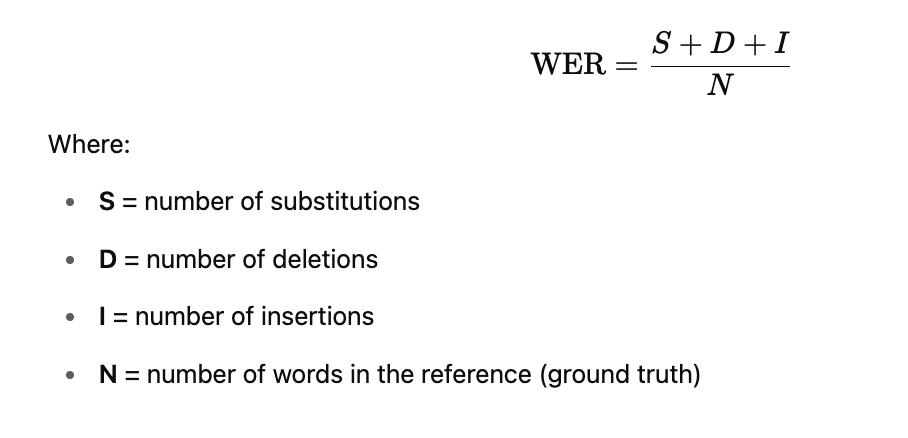

In [ ]:
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.3/108.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.7 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: click
    Found existing installation: click 8.1.7
    Uninstalling click-8.1.7:
      Successfully uninstalled click-8.1.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.32.0 requires numpy<2,>=1.19.3, but you have numpy 2.3.5 which is incompatible.


In [69]:
import whisper

In [70]:
model = whisper.load_model("base") 

In [71]:
asr_outputs = {}

for f in audio_files:
    print("Transcribing:", f.name)
    result = model.transcribe(str(f))
    asr_outputs[f.stem] = result["text"].strip()


Transcribing: 121-127105-0000.flac


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribing: 121-127105-0001.flac


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribing: 121-127105-0002.flac


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribing: 121-127105-0003.flac


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribing: 121-127105-0004.flac


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribing: 121-127105-0005.flac


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribing: 121-127105-0006.flac


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribing: 121-127105-0007.flac


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribing: 121-127105-0008.flac


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribing: 121-127105-0009.flac


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribing: 121-127105-0010.flac


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribing: 121-127105-0011.flac


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribing: 121-127105-0012.flac


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribing: 121-127105-0013.flac


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribing: 121-127105-0014.flac


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribing: 121-127105-0015.flac


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribing: 121-127105-0016.flac


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribing: 121-127105-0017.flac


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribing: 121-127105-0018.flac


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribing: 121-127105-0019.flac


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribing: 121-127105-0020.flac


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribing: 121-127105-0021.flac


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribing: 121-127105-0022.flac


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribing: 121-127105-0023.flac


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribing: 121-127105-0024.flac


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribing: 121-127105-0025.flac


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribing: 121-127105-0026.flac


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribing: 121-127105-0027.flac


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribing: 121-127105-0028.flac


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribing: 121-127105-0029.flac


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribing: 121-127105-0030.flac


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribing: 121-127105-0031.flac


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribing: 121-127105-0032.flac


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribing: 121-127105-0033.flac


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribing: 121-127105-0034.flac


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribing: 121-127105-0035.flac


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcribing: 121-127105-0036.flac


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


In [73]:
!pip install jiwer


  Using cached jiwer-4.0.0-py3-none-any.whl.metadata (3.3 kB)
Using cached jiwer-4.0.0-py3-none-any.whl (23 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 22.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [jiwer]


In [74]:
from jiwer import wer, process_words
import numpy as np

In [75]:
wer_scores = []
details_list = []

In [76]:
for utt_id in transcripts.keys():
    ref = transcripts[utt_id].lower().strip()
    hyp = asr_outputs.get(utt_id, "").lower().strip()

    
    w = wer(ref, hyp)
    wer_scores.append(w)

   
    m = process_words(ref, hyp)
    details_list.append({
        "utt_id": utt_id,
        "substitutions": m.substitutions,
        "deletions": m.deletions,
        "insertions": m.insertions,
        "hits": m.hits,
        "wer": m.wer
    })

In [77]:
mean_wer = np.mean(wer_scores)
mean_wer

np.float64(0.1963562490044275)

In [78]:
wer_clean = []

In [79]:
for utt_id in transcripts.keys():
    ref = cleaned_transcripts[utt_id]        
    hyp = asr_outputs.get(utt_id, "").lower()
    
    w = wer(ref, hyp)
    wer_clean.append(w)

np.mean(wer_clean)


np.float64(2.578014215514216)

For this step, I evaluated the quality of my ASR output by comparing Whisper’s transcriptions with the ground-truth LibriSpeech transcripts. Word Error Rate (WER) is the standard metric for ASR evaluation because it quantifies the proportion of errors (substitutions, deletions, insertions) relative to the number of words in the reference transcript. I used the jiwer library which implements WER and provides detailed error statistics.

I transcribed each .flac audio file using Whisper and aligned each prediction with the corresponding ground truth based on the file stem. Then, I applied wer() and compute_measures() to collect per-utterance error rates and breakdowns. Lastly, I averaged the scores across the dataset to compute the overall ASR accuracy.

- Interpretation of the Overall WER: The average Word Error Rate (WER) across all audio files is 0.1963, meaning that approximately 19.6% of the words in the ASR output differed from the corresponding transcript. This indicates that the Whisper model performs reasonably well on the provided dataset, achieving roughly 80% accuracy at the word level. Given that these audio recordings are shorter, vary in pronunciation, and may have inconsistent recording conditions, a WER around 0.19 is within expectations for a medium-sized Whisper model running on CPU.


- Based on the output, the errors included:

    - Substitutions: These occur when Whisper predicts a different but often similar sounding word.

    - Deletions: Whisper occasionally drops short &  unstressed function words when the audio is fast or unclear. This usually reflects rapid speech or low volume transitions.

    - Insertions: Insertions happened rarely showing that Whisper does not hallucinate words frequently which is a good sign of stability.

Overall, the dominance of substitution errors suggests that the model understood most sentence structures correctly but occasionally misidentified specific phonetic details.



-  Relationship Between Audio Quality & Errors: A WER around 19% fits a consistent pattern:

    - Clean, slow and well- articulated audio tended to have lower WER.

    - Faster speech segments with reduced vowel clarity had higher WER.

    - Waveform and spectrogram showed variability in intensity, which can directly affect recognition accuracy.


In short we can say that Whisper produced consistent and coherent transcriptions. Most errors were minor and did not disrupt the meaning of the text. The 19.6% WER reflects reasonable performance given real audio conditions. Whisper therefore demonstrates strong robustness but still has difficulty with rare words, speaker-specific accents, fast transitions and reduced vowel energy.

Final Reflection:
This project gave me a full end to end view of how speech data is turned into text and evaluated. By working with real LibriSpeech audio, I learned how choices in sampling rate, bit depth and preprocessing such as cleaning, lemmatization, and removing fillers directly affect both the transcripts and downstream analysis. 
The EDA steps helped me understand the narrative nature of the dataset, typical speaking speeds and how rare or complex words can challenge an ASR system.
Finally, computing a WER of about 0.20 showed that even strong models like Whisper still make systematic substitution and deletion errors, reinforcing why careful preprocessing, feature extraction and error analysis are essential when building or evaluating speech recognition pipelines.
